<a href="https://colab.research.google.com/github/nklsrmy/CC_MACLRL_EXERCISES_COM222ML/blob/main/Exercise7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 7: Hate Speech Classification using Multinomial Naive Bayes

Instructions:
- You do not need to split your data. Use the training, validation and test sets provided below.
- Use Multinomial Naive Bayes to train a model that can classify if a sentence is a hate speech or non-hate speech
- A sentence with a label of zero (0) is classified as non-hate speech
- A sentence with a label of one (1) is classified as a hate speech

Apply text pre-processing techniques such as
- Converting to lowercase
- Stop word Removal
- Removal of digits, special characters
- Stemming or Lemmatization but not both
- Count Vectorizer or TF-IDF Vectorizer but not both

Evaluate your model by:
- Providing input by yourself
- Creating a Confusion Matrix
- Calculating the Accuracy, Precision, Recall and F1-Score

In [129]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
!pip install advertools

In [130]:
splits = {'train': 'unique_train_dataset.csv', 'validation': 'unique_validation_dataset.csv', 'test': 'unique_test_dataset.csv'}

**Training Set**

Use this to train your model

In [131]:
df_train = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["train"])

**Validation Set**

Use this set to evaluate your model

In [132]:
df_validation = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["validation"])

**Test Set**
  
Use this set to test your model

In [133]:
df_test = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["test"])

## A. Understanding your training data

1. Check the first 10 rows of the training dataset

In [134]:
# put your answer here
df_train.sample(10)

,text,label
702,RT [USERNAME]: You're hating DJ because he's e...,0
21654,[USERNAME] oo e asar n asar n ako sa mukha ni ...,1
14924,Don't bother. Ngayon pa lang alam na namin ang...,1
9353,anghel (nakaluhod na era) See Us Hear Us [USER...,0
4149,PULA ANG KULAY NG MAGNANAKAW MGA ULOL!,1
9982,PINK everywhere! Nanonood ako ng UAAP Seasonli...,0
21641,[USERNAME] Comelec Debate Rizalito David sinab...,0
3532,[USERNAME]and[USERNAME]Ahh Kaya pala Hindi Nag...,1
15003,Morbid Magni [USERNAME] Just some opinions and...,1
1469,Kahit na pakitaan mo ng facts ang ibang supp n...,1


2. Check how many rows and columns are in the training dataset using `.info()`

In [135]:
# put your answer here
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21773 entries, 0 to 21772
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    21773 non-null  object
 1   label   21773 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 340.3+ KB


3. Check for NaN values

In [136]:
# put your answer here
df_train.isna().sum()

,0
text,0
label,0


4. Check for duplicate rows

In [137]:
# put your answer here
df_train.duplicated().sum()

0

5. Check how many rows belong to each class

In [138]:
# put your answer here
df_train['label'].value_counts()

,count
label,
1,10994
0,10779


## B. Text pre-processing

6. Remove duplicate rows

In [317]:
# put your answer here
df_train.drop_duplicates(inplace=True)

7. Remove rows with NaN values

In [319]:
# put your answer here
df = df_train.dropna(inplace=True)

8. Convert all text to lowercase

In [141]:
# put your answer here
df['text'] = df['text'].str.lower()

9. Remove digits, URLS and special characters

In [320]:
# put your answer here
df_train['text'] = df_train['text'].str.replace(r'\d+|http\S+|[^a-zA-Z\s]', '', regex=True)

10. Remove stop words

In [321]:
# put your answer here
from nltk.corpus import stopwords
import nltk
import advertools as adv
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stop_words_tagalog = set(adv.stopwords['tagalog'])

def remove_stop_words(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words and word not in stop_words_tagalog]
    return ' '.join(filtered_words)

df_train['text'] = df_train['text'].apply(remove_stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


11. Use Stemming or Lemmatization

In [322]:
# put your answer here
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

df_train['text'] = df_train['text'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## C. Training your model

12. Put all text training data in variable **X_train**

In [323]:
# put your answer here
X_train = df_train['text']

13. Put all training data labels in variable **y_train**

In [324]:
# put your answer here
y_train = df_train['label']

14. Use `CountVectorizer()` or `TfidfVectorizer()` to convert text data to its numerical form.

Put the converted data to **X_train_transformed** variable

In [326]:
# put your answer here
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)

15. Create an instance of `MultinomalNB()`

In [328]:
# put your answer here
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

16. Train the model using `.fit()`

In [329]:
# put your answer here
model.fit(X_train_transformed, y_train)

MultinomialNB()

## D. Evaluate your model

17. Use `.predict()` to generate model predictions using the **validation dataset**


- Put all text validation data in **X_validation** variable

- Convert **X_validation** to its numerical form.

- Put the converted data to **X_validation_transformed**

- Put all predictions in **y_validation_pred** variable

In [330]:
# put your answer here
vectorizer.fit(X_train)
X_validation = df_validation['text']
X_validation_transformed = vectorizer.transform(X_validation)
y_validation_pred = model.predict(X_validation_transformed)

18. Get the Accuracy, Precision, Recall and F1-Score of the model using the **validation dataset**

- Put all validation data labels in **y_validation** variable

In [332]:
# put your answer here
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_validation = df_validation['label']

accuracy = accuracy_score(y_validation, y_validation_pred)
precision = precision_score(y_validation, y_validation_pred)
recall = recall_score(y_validation, y_validation_pred)
f1 = f1_score(y_validation, y_validation_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.8225
Precision: 0.8015768725361366
Recall: 0.8621908127208481
F1 Score: 0.8307797071842016


19. Create a confusion matrix using the **validation dataset**

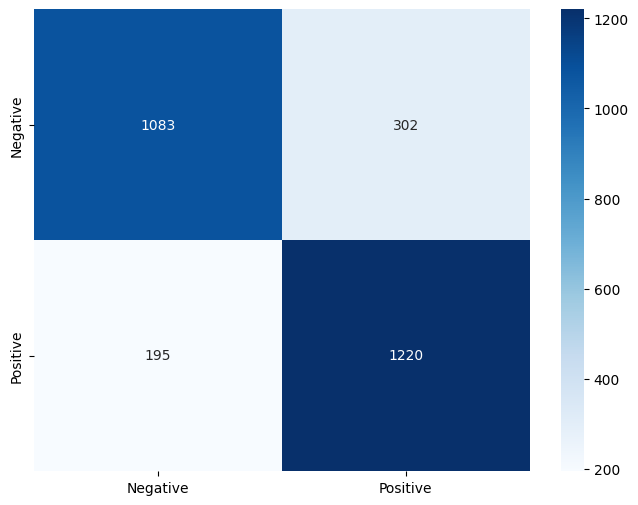

In [338]:
# put your answer here
from sklearn.metrics import confusion_matrix
cm_validation = confusion_matrix(y_validation, y_validation_pred)

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm_validation, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.show()

20. Use `.predict()` to generate the model predictions using the **test dataset**


- Put all text validation data in **X_test** variable

- Convert **X_test** to its numerical form.

- Put the converted data to **X_test_transformed**

- Put all predictions in **y_test_pred** variable

In [340]:
# put your answer here
X_test = df_test['text']
X_test_transformed = vectorizer.transform(X_test)
y_test_pred = model.predict(X_test_transformed)

21. Get the Accuracy, Precision, Recall and F1-Score of the model using the **test dataset**

- Put all test data labels in **y_validation** variable



In [341]:
# put your answer here
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_test = df_test['label']

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.8281138790035587
Precision: 0.8043912175648703
Recall: 0.8648068669527897
F1 Score: 0.8335056876938987


22. Create a confusion matrix using the **test dataset**

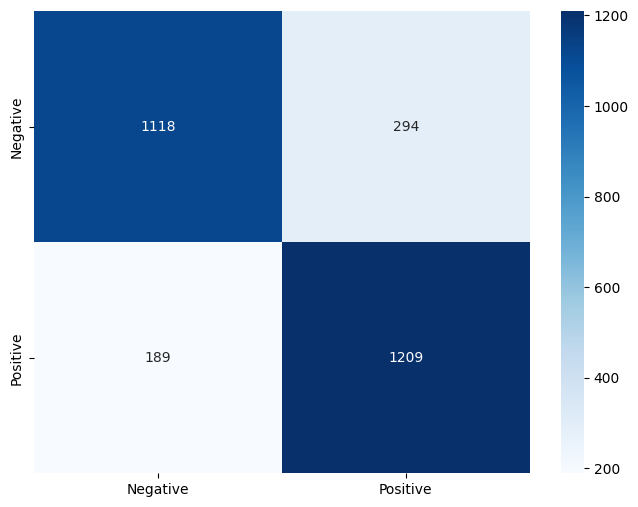

In [342]:
# put your answer here
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_test_pred)

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.show()

## E. Test the model

23. Test the model by providing a non-hate speech input. The model should predict it as 0

In [344]:
# put your answer here
text_input = ['Buhay ay di karera.']
input_transformed = vectorizer.transform(text_input)
prediction = model.predict(input_transformed)
print(prediction)

[0]


24. Test the model by providing a hate speech input. The model should predict it as 1

In [350]:
# put your answer here
text_input = ['Mukha kang palaka.']
input_transformed = vectorizer.transform(text_input)
prediction = model.predict(input_transformed)
print(prediction)

[1]
